In [7]:
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [14]:
def read_fusion_log():
    log_path_file = "./fusion_1080/fusion.log"
    stats = OrderedDict()
    obstacles_published = []
    with open(log_path_file) as log_file:
        lines = log_file.readlines()
        stats["MeasurementsInsertion"] = np.array([float(line.strip().split()[-1]) for line in lines if "Measurements Insertion" in line])
        stats["Latest Frames"] = np.array([float(line.strip().split()[-1]) for line in lines if "Latest Frames" in line])
        stats["Fusion Frames"] = np.array([float(line.strip().split()[-1]) for line in lines if "Fusion Frames" in line])
        stats["Fusion Collection"] = np.array([float(line.strip().split()[-1]) for line in lines if "Fusion Collection" in line])
        obstacles_published = np.array([float(line.strip().split()[-2]) for line in lines if "publish_number" in line])
    assert  stats["MeasurementsInsertion"].shape[0] == stats["Latest Frames"].shape[0] == \
            stats["Fusion Frames"].shape[0] == stats["Fusion Collection"].shape[0] == \
            obstacles_published.shape[0]
    return stats, obstacles_published
        
        
        
        
        
        
        

In [36]:
def plot_fusion_log(stats, obstacles_published):
    response_time = np.zeros(stats["MeasurementsInsertion"].shape[0])
    for key in stats.keys():
        response_time += stats[key]
    average_response_time = np.round(np.mean(response_time), decimals=3)
    figure, axes1 = plt.subplots(figsize=(20,10))
    axes1.bar(range(obstacles_published.shape[0]), response_time)
    axes1.set_ylabel("Response Time [ms]")
    axes1.set_xlabel("Frame")
    axes2 = axes1.twinx()
    axes2.plot(range(obstacles_published.shape[0]), obstacles_published, "o", color="red")
    axes2.set_ylabel("Obstacles Published")
    plt.title("Fusion Average Response Time {} ms".format(average_response_time))
    plt.savefig("fusion.svg")
    avg_stats = OrderedDict()
    for key in stats.keys():
        avg_stats[key] = np.round(np.mean(stats[key]), decimals=3)
        print("{} - {}".format(key, avg_stats[key]))
    bottom = np.zeros(len(obstacles_published))
    figure, axes1 = plt.subplots(figsize=(20,10))
    bars = []
    names = []
    for key in stats.keys():
        bars.append(axes1.bar(range(len(obstacles_published)), stats[key], bottom=bottom))
        bottom += stats[key]
        names.append("{} {} ms".format(key, avg_stats[key]))
    axes1.set_ylabel("Response Time [ms]")
    axes1.set_xlabel("Frame")
    axes1.legend(bars, names)
    axes2 = axes1.twinx()
    axes2.plot(range(obstacles_published.shape[0]), obstacles_published, "o", color="red")
    axes2.set_ylabel("Obstacles Published")
    plt.title("Fusion Average Response Time {} ms".format(average_response_time))
    plt.savefig("fusion_step.svg")

MeasurementsInsertion - 0.105
Latest Frames - 0.011
Fusion Frames - 1.768
Fusion Collection - 0.178


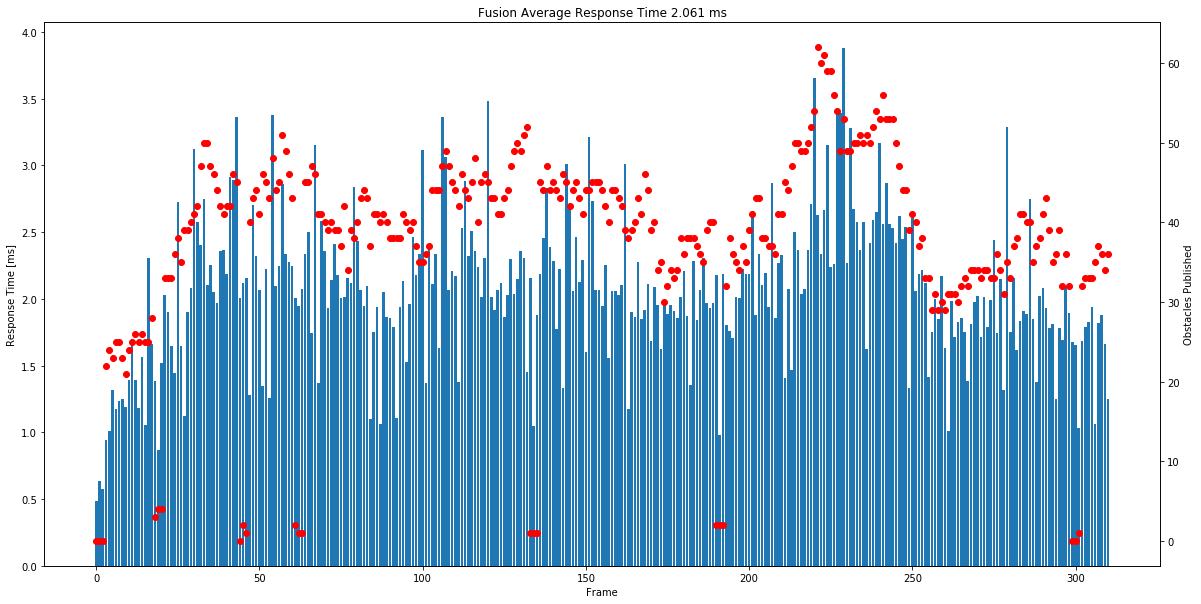

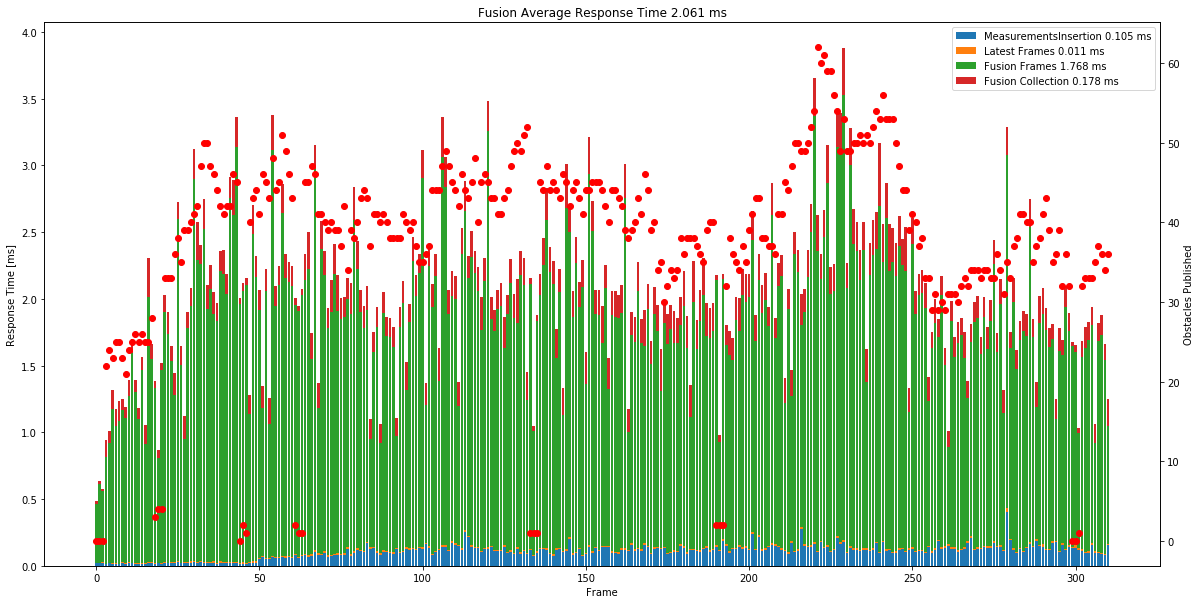

In [37]:
stats, obstacles_published = read_fusion_log()
plot_fusion_log(stats, obstacles_published)

10
